# Question: Who is statistically the MVP of the league?

#### Install `nba_api` if you haven't already

In [ ]:
%pip install nba_api

## Imports

In [72]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats, leaguedashplayerstats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read In Data

In [73]:
# Basic stats for the 2023-24 regular season (Total)
base_player_stats_total = leaguedashplayerstats.LeagueDashPlayerStats(
    season='2023-24',
    season_type_all_star='Regular Season',
    measure_type_detailed_defense='Base',
    per_mode_detailed = 'Totals'
)

# Basic stats for the 2023-24 regular season (Per Game)
base_player_stats_per_game = leaguedashplayerstats.LeagueDashPlayerStats(
    season='2023-24',
    season_type_all_star='Regular Season',
    measure_type_detailed_defense='Base',
    per_mode_detailed = 'PerGame'
)

# Advanced stats for the 2023-24 regular season (Total)
advanced_player_stats_total = leaguedashplayerstats.LeagueDashPlayerStats(
    season='2023-24',
    season_type_all_star='Regular Season',
    measure_type_detailed_defense='Advanced',
    per_mode_detailed = 'Totals'
)

# Advanced stats for the 2023-24 regular season (Per Game)
advanced_player_stats_per_game = leaguedashplayerstats.LeagueDashPlayerStats(
    season='2023-24',
    season_type_all_star='Regular Season',
    measure_type_detailed_defense='Advanced',
    per_mode_detailed = 'PerGame'
)

# Convert the class: LeagueDashPlayerStats [A wrapper for the API response] to a list of pandas DataFrames 
# and extract only the actual table we need
base_player_stats_total_df = base_player_stats_total.get_data_frames()[0]
base_player_stats_per_game_df = base_player_stats_per_game.get_data_frames()[0]
advanced_player_stats_total_df = advanced_player_stats_total.get_data_frames()[0]
advanced_player_stats_per_game_df = advanced_player_stats_per_game.get_data_frames()[0]

In [74]:
# Apply Minimum Requirements to be eligible for end of season MVP Award
base_player_stats_total_df = base_player_stats_total_df[base_player_stats_total_df['GP'] > 64]
base_player_stats_per_game_df = base_player_stats_per_game_df[base_player_stats_per_game_df['MIN'] > 24]

In [63]:
# Run this code if you want to see what columns/catergories are available

print("Categories for Total Season Statistics")
base_player_stats_total_df.columns.tolist()
for catergory in base_player_stats_total_df:
    print(catergory)

print("")
print("")
print("")

print("Categories for Per Game Statistics")
base_player_stats_per_game_df.columns.tolist()
for catergory in base_player_stats_per_game_df:
    print(catergory)


Categories for Total Season Statistics
PLAYER_ID
PLAYER_NAME
NICKNAME
TEAM_ID
TEAM_ABBREVIATION
AGE
GP
W
L
W_PCT
MIN
FGM
FGA
FG_PCT
FG3M
FG3A
FG3_PCT
FTM
FTA
FT_PCT
OREB
DREB
REB
AST
TOV
STL
BLK
BLKA
PF
PFD
PTS
PLUS_MINUS
NBA_FANTASY_PTS
DD2
TD3
WNBA_FANTASY_PTS
GP_RANK
W_RANK
L_RANK
W_PCT_RANK
MIN_RANK
FGM_RANK
FGA_RANK
FG_PCT_RANK
FG3M_RANK
FG3A_RANK
FG3_PCT_RANK
FTM_RANK
FTA_RANK
FT_PCT_RANK
OREB_RANK
DREB_RANK
REB_RANK
AST_RANK
TOV_RANK
STL_RANK
BLK_RANK
BLKA_RANK
PF_RANK
PFD_RANK
PTS_RANK
PLUS_MINUS_RANK
NBA_FANTASY_PTS_RANK
DD2_RANK
TD3_RANK
WNBA_FANTASY_PTS_RANK



Categories for Per Game Statistics
PLAYER_ID
PLAYER_NAME
NICKNAME
TEAM_ID
TEAM_ABBREVIATION
AGE
GP
W
L
W_PCT
MIN
FGM
FGA
FG_PCT
FG3M
FG3A
FG3_PCT
FTM
FTA
FT_PCT
OREB
DREB
REB
AST
TOV
STL
BLK
BLKA
PF
PFD
PTS
PLUS_MINUS
NBA_FANTASY_PTS
DD2
TD3
WNBA_FANTASY_PTS
GP_RANK
W_RANK
L_RANK
W_PCT_RANK
MIN_RANK
FGM_RANK
FGA_RANK
FG_PCT_RANK
FG3M_RANK
FG3A_RANK
FG3_PCT_RANK
FTM_RANK
FTA_RANK
FT_PCT_RANK
OREB_RANK
DREB_RANK
REB_RAN

# Exploratory Data Analysis (EDA)

## Regular Season 2023-24: Plus/Minus (+/-)

### Histogram with KDE

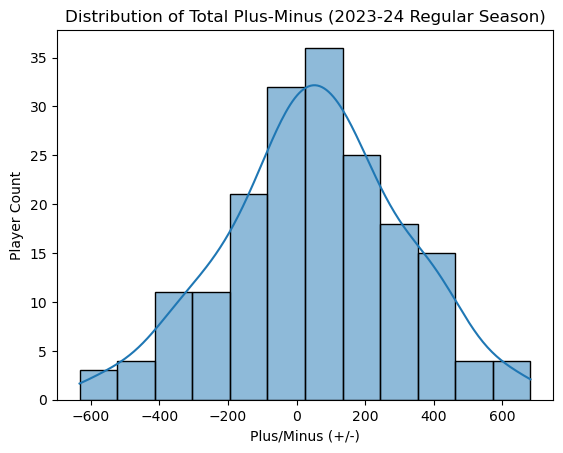

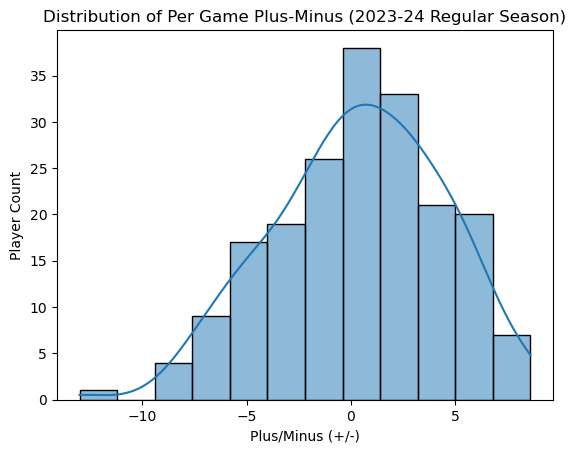

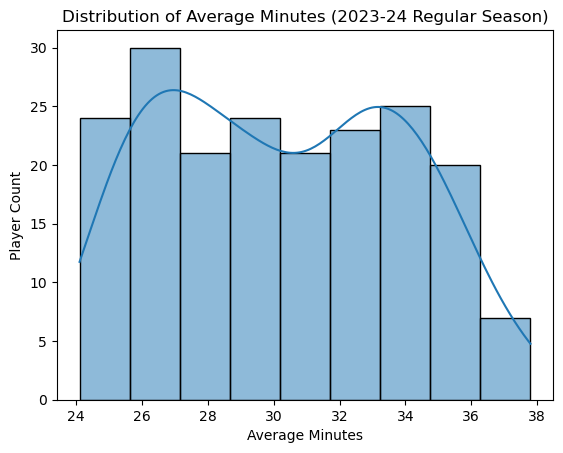

In [64]:
sns.histplot(base_player_stats_total_df['PLUS_MINUS'], kde=True)
plt.title('Distribution of Total Plus-Minus (2023-24 Regular Season)')
plt.xlabel('Plus/Minus (+/-)')
plt.ylabel('Player Count')
plt.show()

sns.histplot(base_player_stats_per_game_df['PLUS_MINUS'], kde=True)
plt.title('Distribution of Per Game Plus-Minus (2023-24 Regular Season)')
plt.xlabel('Plus/Minus (+/-)')
plt.ylabel('Player Count')
plt.show()


sns.histplot(base_player_stats_per_game_df['MIN'], kde=True)
plt.title('Distribution of Average Minutes (2023-24 Regular Season)')
plt.xlabel('Average Minutes')
plt.ylabel('Player Count')
plt.show()

### Top and Bottom Performers

In [51]:
total_top_pfrm = base_player_stats_total_df[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'PLUS_MINUS', 'MIN']].sort_values(by='PLUS_MINUS', ascending=False).head(10)
print("Top Total +/- for 2023-24 Regular Season")
print(total_top_pfrm)

print("")
print("")
print("")

total_bot_pfrm = base_player_stats_total_df[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'PLUS_MINUS', 'MIN']].sort_values(by='PLUS_MINUS', ascending=True).head(10)
print("Bottom Total +/- for 2023-24 Regular Season")
print(total_bot_pfrm)

Top Total +/- for 2023-24 Regular Season
                  PLAYER_NAME TEAM_ABBREVIATION  PLUS_MINUS          MIN
434              Nikola Jokić               DEN         682  2736.533333
142             Derrick White               BOS         619  2380.985000
501   Shai Gilgeous-Alexander               OKC         613  2552.686667
268              Jayson Tatum               BOS         608  2645.213333
333  Kentavious Caldwell-Pope               DEN         572  2401.756667
233             Jalen Brunson               NYK         512  2726.303333
490                Sam Hauser               BOS         492  1740.585000
406        Michael Porter Jr.               DEN         472  2564.605000
462               Paul George               LAC         461  2501.766667
464          Payton Pritchard               BOS         449  1825.733333



Bottom Total +/- for 2023-24 Regular Season
        PLAYER_NAME TEAM_ABBREVIATION  PLUS_MINUS          MIN
410   Miles Bridges               CHA        -

In [65]:
per_game_top_pfrm = base_player_stats_per_game_df[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'PLUS_MINUS', 'MIN']].sort_values(by='PLUS_MINUS', ascending=False).head(10)
print("Top Per Game +/- for 2023-24 Regular Season")
print(per_game_top_pfrm)

print("")
print("")
print("")

per_game_bot_pfrm = base_player_stats_per_game_df[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'PLUS_MINUS', 'MIN']].sort_values(by='PLUS_MINUS', ascending=True).head(10)
print("Bottom Per Game +/- for 2023-24 Regular Season")
print(per_game_bot_pfrm)

Top Per Game +/- for 2023-24 Regular Season
                  PLAYER_NAME TEAM_ABBREVIATION  PLUS_MINUS   MIN
434              Nikola Jokić               DEN         8.6  34.6
142             Derrick White               BOS         8.5  32.6
268              Jayson Tatum               BOS         8.2  35.7
501   Shai Gilgeous-Alexander               OKC         8.2  34.0
439                OG Anunoby               NYK         7.8  34.0
333  Kentavious Caldwell-Pope               DEN         7.5  31.6
354        Kristaps Porziņģis               BOS         7.3  29.6
283               Joel Embiid               PHI         6.8  33.6
233             Jalen Brunson               NYK         6.6  35.4
10                 Al Horford               BOS         6.5  26.8



Bottom Per Game +/- for 2023-24 Regular Season
         PLAYER_NAME TEAM_ABBREVIATION  PLUS_MINUS   MIN
528      Timmy Allen               MEM       -13.0  25.1
410    Miles Bridges               CHA        -9.2  37.4
356      

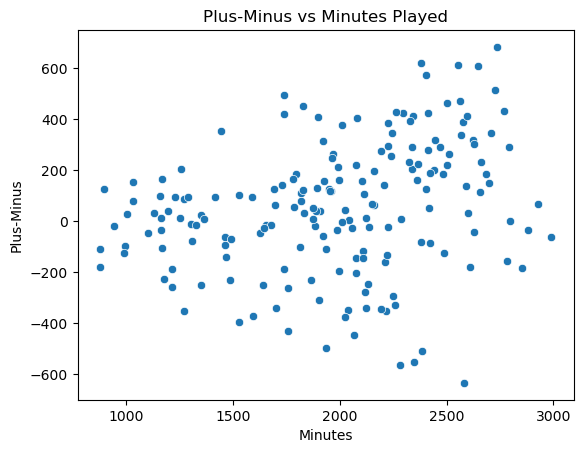

In [68]:
sns.scatterplot(data=base_player_stats_total_df, x='MIN', y='PLUS_MINUS')
plt.title('Plus-Minus vs Minutes Played')
plt.xlabel('Minutes')
plt.ylabel('Plus-Minus')
plt.show()

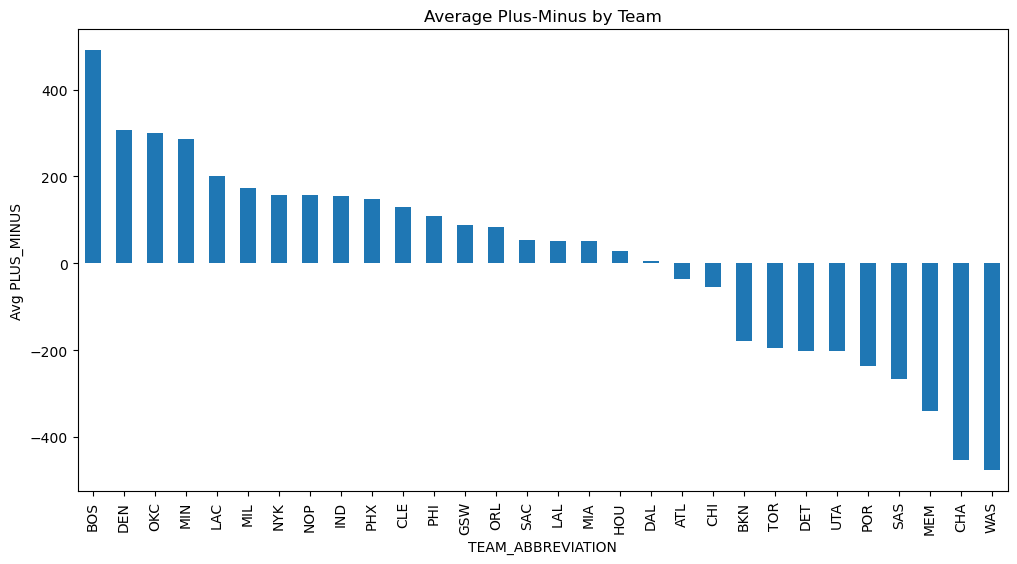

In [67]:
pm_by_team = base_player_stats_total_df.groupby('TEAM_ABBREVIATION')['PLUS_MINUS'].mean().sort_values(ascending=False)

pm_by_team.plot(kind='bar', figsize=(12,6), title='Average Plus-Minus by Team')
plt.ylabel('Avg PLUS_MINUS')
plt.show()

## Regular Season 2023-24: Player Efficiency Rating

### True Shooting Percentage

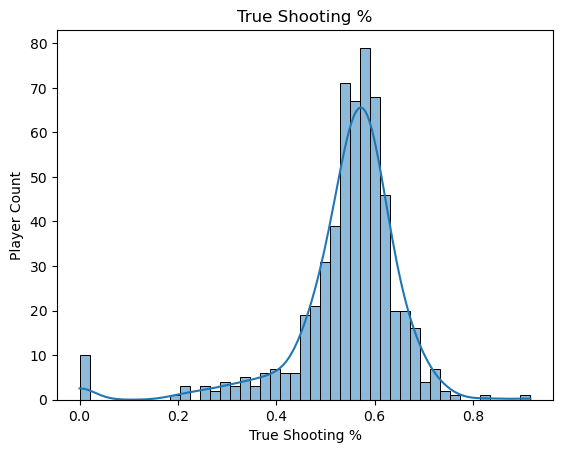

In [ ]:
sns.histplot(data=advanced_player_stats_total_df['TS_PCT'], kde=True)
plt.title('True Shooting %')
plt.xlabel('True Shooting %')
plt.ylabel('Player Count')
plt.show()